In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\TiTO.tech\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df_exploaded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

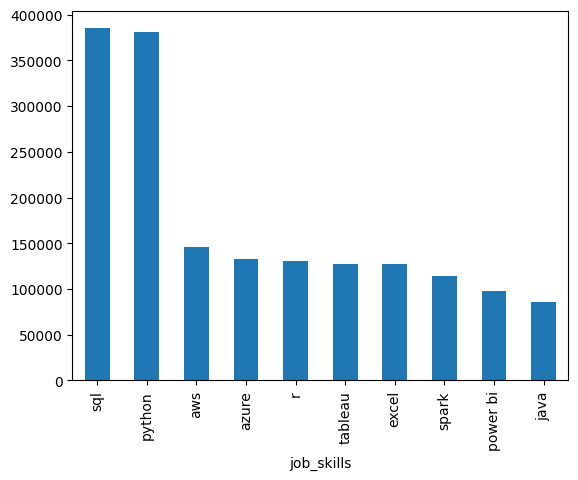

In [5]:
 df_exploaded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:

df_exploaded = df.explode('job_skills')
skills_count = df_exploaded.groupby(['job_title_short','job_skills',]).size()
df_skills_count = skills_count.reset_index(name='skill_counts')
df_skills_count = df_skills_count.sort_values(by='skill_counts', ascending=False).head(30)

In [7]:
df_skills_count = skills_count.reset_index(name='skill_counts')
df_skills_count = df_skills_count.sort_values(by='skill_counts', ascending=False).head(30)

In [8]:
df_skills_count

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
494,Data Analyst,excel,66860
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
1070,Data Scientist,r,59566
590,Data Analyst,python,57190


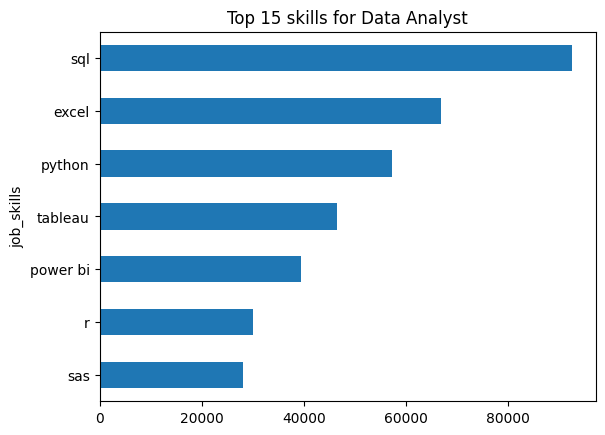

In [9]:
job_title = 'Data Analyst'  # match the value in df_skills_count
top_skills = 15
df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(10)
df_skill_final.plot(kind='barh', x='job_skills', y='skill_counts', title=f'Top {top_skills} skills for {job_title}', legend=False)
plt.gca().invert_yaxis()
plt.show()

